In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy, os
from sqlalchemy import create_engine

In [2]:
olap = create_engine('mysql+pymysql://root:''@localhost/marketing')
conn = olap.connect()

In [3]:
#Retrieve data

df = pd.read_sql("""SELECT car.Model_Year, car.Mfr_Name, car.Division, car.Carline, car.Drive_Desc, car.Carline_Class_Desc, car.Release_Date,
                           engine.Engine_Displacement, engine.Cylinders, engine.Air_Aspiration_Method, trans.Transmission, trans.Trans_Desc, trans.Gears,
                           fe.City_FE, fe.Highway_FE, fe.Combined_FE, fe.City_CO2, fe.Highway_CO2, fe.Combined_CO2 FROM fe_facts fe 
                    INNER JOIN car ON car.Model_ID = fe.Model_ID
                    INNER JOIN transmission trans ON trans.Trans_ID = fe.Trans_ID
                    INNER JOIN engine ON engine.Engine_ID = fe.Engine_ID;
                """, conn)

In [4]:
df

,Model_Year,Mfr_Name,Division,Carline,Drive_Desc,Carline_Class_Desc,Release_Date,Engine_Displacement,Cylinders,Air_Aspiration_Method,Transmission,Trans_Desc,Gears,City_FE,Highway_FE,Combined_FE,City_CO2,Highway_CO2,Combined_CO2
0,2015,Mercedes-Benz,Mercedes-Benz,Smart fortwo (Convertible),"2-Wheel Drive, Rear",Two Seaters,2014-06-03,1.0,3,Naturally Aspirated,Auto,Automated Manual,5,34,38,36,256,228,244
1,2015,Mercedes-Benz,Mercedes-Benz,Smart fortwo (COUPE),"2-Wheel Drive, Rear",Two Seaters,2014-06-03,1.0,3,Naturally Aspirated,Auto,Automated Manual,5,34,38,36,256,228,244
2,2015,Ford Motor Company,Ford,Fiesta FWD,"2-Wheel Drive, Front",Subcompact Cars,2014-06-20,1.6,4,Naturally Aspirated,Auto,Automated Manual,6,27,37,31,328,242,289
3,2015,Ford Motor Company,Ford,Fiesta SFE FWD,"2-Wheel Drive, Front",Subcompact Cars,2014-06-20,1.6,4,Naturally Aspirated,Auto,Automated Manual,6,28,38,32,319,233,281
4,2015,Nissan,NISSAN,GT-R,All Wheel Drive,Subcompact Cars,2014-01-03,3.8,6,Turbocharged,Auto,Automated Manual,6,16,23,19,536,394,472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9242,2022,Porsche,Porsche,911 Targa 4S,All Wheel Drive,Minicompact Cars,2021-08-20,3.0,6,Turbocharged,Manual,Manual,7,17,24,20,512,368,447
9243,2022,Ford Motor Company,Ford,BRONCO 4WD,Part-time 4-Wheel Drive,Small SUV 4WD,2021-12-16,2.3,4,Turbocharged,Manual,Manual,7,20,21,20,451,425,439
9244,2022,Ford Motor Company,Ford,BRONCO BADLANDS 4WD,Part-time 4-Wheel Drive,Small SUV 4WD,2021-12-16,2.3,4,Turbocharged,Manual,Manual,7,16,17,17,562,510,538
9245,2022,Ford Motor Company,Ford,BRONCO BLACK DIAMOND 4WD,Part-time 4-Wheel Drive,Small SUV 4WD,2021-12-16,2.3,4,Turbocharged,Manual,Manual,7,17,19,18,523,468,494


## Quick Analysis of the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9247 entries, 0 to 9246
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Model_Year             9247 non-null   int64  
 1   Mfr_Name               9247 non-null   object 
 2   Division               9247 non-null   object 
 3   Carline                9247 non-null   object 
 4   Drive_Desc             9247 non-null   object 
 5   Carline_Class_Desc     9247 non-null   object 
 6   Release_Date           9247 non-null   object 
 7   Engine_Displacement    9247 non-null   float64
 8   Cylinders              9247 non-null   int64  
 9   Air_Aspiration_Method  9247 non-null   object 
 10  Transmission           9247 non-null   object 
 11  Trans_Desc             9247 non-null   object 
 12  Gears                  9247 non-null   int64  
 13  City_FE                9247 non-null   int64  
 14  Highway_FE             9247 non-null   int64  
 15  Comb

In [7]:
df.describe()

,Model_Year,Engine_Displacement,Cylinders,Gears,City_FE,Highway_FE,Combined_FE,City_CO2,Highway_CO2,Combined_CO2
count,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000
mean,2018.638045,3.127133,5.608414,7.066400,20.584081,27.594247,23.179085,463.050178,338.677517,407.224181
std,2.178185,1.335100,1.860395,1.747568,5.983089,6.131655,5.948527,117.893799,75.581704,97.108938
min,2015.000000,0.900000,3.000000,1.000000,8.000000,11.000000,9.000000,152.000000,149.000000,151.000000
25%,2017.000000,2.000000,4.000000,6.000000,17.000000,23.000000,19.000000,382.000000,285.000000,338.000000
50%,2019.000000,3.000000,6.000000,7.000000,20.000000,27.000000,22.000000,452.000000,330.000000,398.000000
75%,2021.000000,3.600000,6.000000,8.000000,23.000000,31.000000,26.000000,535.000000,384.000000,467.000000
max,2022.000000,8.400000,16.000000,10.000000,58.000000,60.000000,59.000000,1135.000000,818.000000,979.000000


<AxesSubplot:xlabel='Combined_CO2', ylabel='Count'>

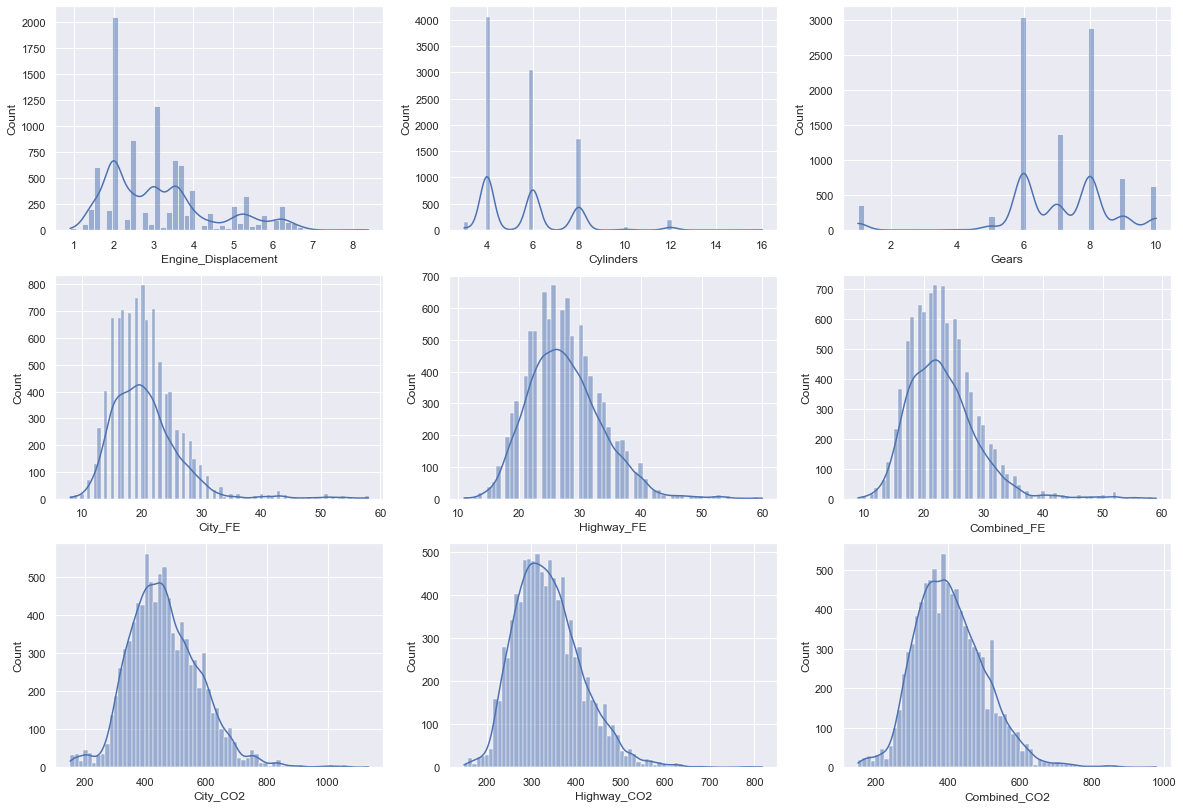

In [8]:
#Distribution for each numerical attribute

sns.set(style="darkgrid")
fig, axs = plt.subplots(3, 3, figsize = (20, 14))

sns.histplot(data = df, x = "Engine_Displacement", kde = True, ax = axs[0, 0])
sns.histplot(data = df, x = "Cylinders", kde = True, ax = axs[0, 1])
sns.histplot(data = df, x = "Gears", kde = True, ax = axs[0, 2])
sns.histplot(data = df, x = "City_FE", kde = True, ax = axs[1, 0])
sns.histplot(data = df, x = "Highway_FE", kde = True, ax = axs[1, 1])
sns.histplot(data = df, x = "Combined_FE", kde = True, ax = axs[1, 2])
sns.histplot(data = df, x = "City_CO2", kde = True, ax = axs[2, 0])
sns.histplot(data = df, x = "Highway_CO2", kde = True, ax = axs[2, 1])
sns.histplot(data = df, x = "Combined_CO2", kde = True, ax = axs[2, 2])

<AxesSubplot:xlabel='Combined_CO2'>

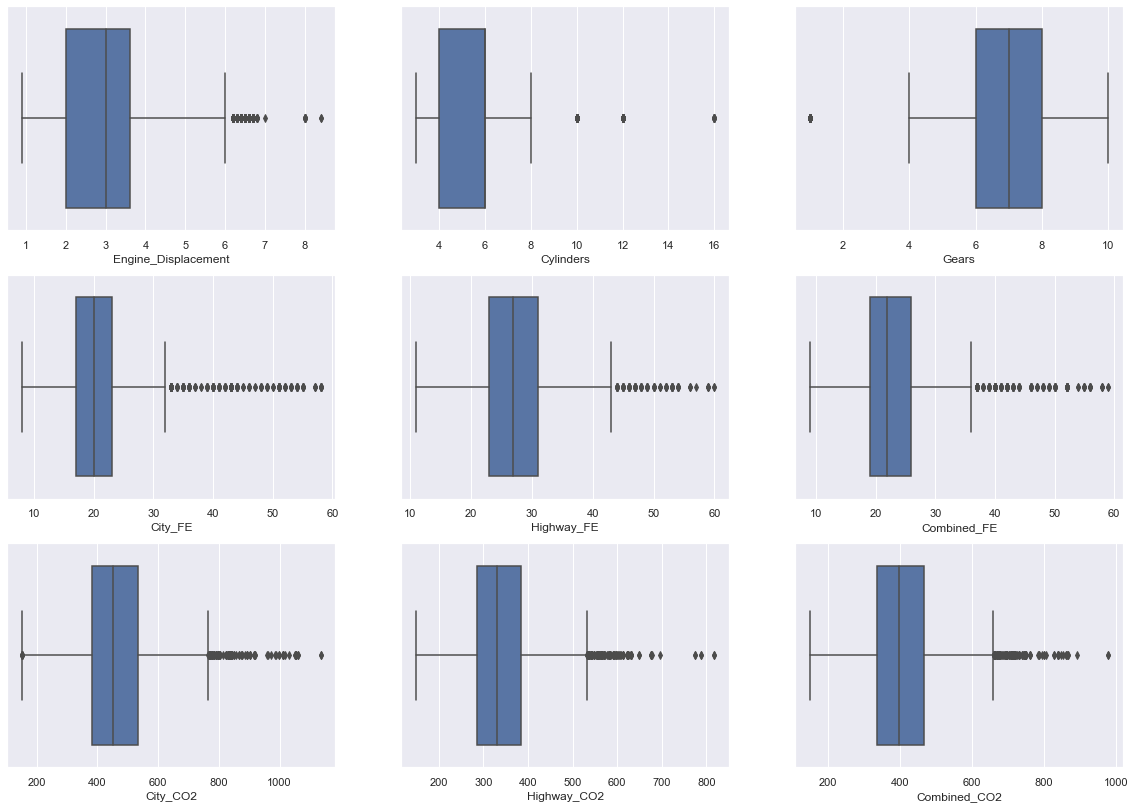

In [9]:
#Boxplot for identification of outliers

sns.set(style="darkgrid")
fig, axs = plt.subplots(3, 3, figsize = (20, 14))

sns.boxplot(data = df, x = "Engine_Displacement", ax = axs[0, 0])
sns.boxplot(data = df, x = "Cylinders", ax = axs[0, 1])
sns.boxplot(data = df, x = "Gears", ax = axs[0, 2])
sns.boxplot(data = df, x = "City_FE", ax = axs[1, 0])
sns.boxplot(data = df, x = "Highway_FE", ax = axs[1, 1])
sns.boxplot(data = df, x = "Combined_FE", ax = axs[1, 2])
sns.boxplot(data = df, x = "City_CO2", ax = axs[2, 0])
sns.boxplot(data = df, x = "Highway_CO2", ax = axs[2, 1])
sns.boxplot(data = df, x = "Combined_CO2", ax = axs[2, 2])

In [10]:
#Correlation plot between the numerical attributes

corr = df.corr()
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
corr.style.background_gradient(cmap = "coolwarm", axis = None).highlight_null(null_color = '#f1f1f1').format(precision = 2)

,Model_Year,Engine_Displacement,Cylinders,Gears,City_FE,Highway_FE,Combined_FE,City_CO2,Highway_CO2,Combined_CO2
Model_Year,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Engine_Displacement,0.01,nan,nan,nan,nan,nan,nan,nan,nan,nan
Cylinders,0.00,0.92,nan,nan,nan,nan,nan,nan,nan,nan
Gears,0.25,0.26,0.26,nan,nan,nan,nan,nan,nan,nan
City_FE,0.02,-0.70,-0.68,-0.41,nan,nan,nan,nan,nan,nan
Highway_FE,-0.07,-0.73,-0.70,-0.36,0.91,nan,nan,nan,nan,nan
Combined_FE,-0.01,-0.73,-0.71,-0.40,0.99,0.96,nan,nan,nan,nan
City_CO2,-0.00,0.85,0.84,0.32,-0.90,-0.89,-0.92,nan,nan,nan
Highway_CO2,0.08,0.77,0.75,0.29,-0.82,-0.94,-0.88,0.92,nan,nan
Combined_CO2,0.03,0.84,0.83,0.31,-0.89,-0.93,-0.92,0.99,0.97,nan


In [11]:
#Sport cars have large engine displacement and number of cylinders

print(df[df["Engine_Displacement"] > 6.5]['Division'].unique())

print(df[df["Cylinders"] > 8.5]['Division'].unique())

['Bugatti' 'Bentley' 'Rolls-Royce Motor Cars Limited' 'BMW' 'Chevrolet'
 'Dodge']
['Aston Martin Lagonda Ltd' 'Ferrari North America, Inc.'
 'Pagani Automobili S.p.A.' 'Certification' 'Audi' 'Bugatti' 'Lamborghini'
 'Bentley' 'Mercedes-Benz' 'Rolls-Royce Motor Cars Limited' 'BMW' 'Dodge']


In [25]:
# Find the top average fuel economy for the city and highway driving from the given dataset

df['Avg_FE'] = df[['City_FE', 'Highway_FE']].mean(axis = 1)

large = df['Avg_FE'].nlargest(10)
largedf = df[df.index.isin(large.index.tolist())]

print(largedf[['Model_Year', 'Division', 'Carline', 'Transmission', 'Avg_FE']].sort_values(['Avg_FE'], ascending = False))


      Model_Year               Division     Carline Transmission  Avg_FE
387         2021  HYUNDAI MOTOR COMPANY  Ioniq Blue         Auto    59.0
399         2022  HYUNDAI MOTOR COMPANY  Ioniq Blue         Auto    59.0
35          2017  HYUNDAI MOTOR COMPANY  Ioniq Blue         Auto    58.0
41          2018  HYUNDAI MOTOR COMPANY  Ioniq Blue         Auto    58.0
56          2019  HYUNDAI MOTOR COMPANY  Ioniq Blue         Auto    58.0
63          2020  HYUNDAI MOTOR COMPANY  Ioniq Blue         Auto    58.0
398         2022  HYUNDAI MOTOR COMPANY       Ioniq         Auto    55.5
3347        2016                 TOYOTA   PRIUS Eco         Auto    55.5
3393        2017                 TOYOTA   PRIUS Eco         Auto    55.5
3457        2018                 TOYOTA   PRIUS Eco         Auto    55.5


In [60]:
avg = dict()
bad = dict()
good = dict()
for year in df['Model_Year'].unique().tolist():
    avg[year] = df[df['Model_Year'] == year]['Avg_FE'].mean().round(2)
    bad[year] = df[df['Model_Year'] == year][['Division', 'Carline', 'Avg_FE']].nsmallest(2, 'Avg_FE')
    good[year] = df[df['Model_Year'] == year][['Division', 'Carline', 'Avg_FE']].nlargest(2, 'Avg_FE')

# badf = pd.DataFrame(bad).set_index(['Model_Year', 'Division', 'Carline'])
bad[2016]

,Division,Carline,Avg_FE
1789,Mercedes-Benz,AMG G65,12.0
84,"Ferrari North America, Inc.",F12 tdf,13.0


In [52]:
#Export the data to excel file

df.to_excel(os.path.join('C:/Users/Traian Fulea/Desktop/Final Assessment/Data/', 'Processed Data.xlsx'), index = False, header = True)